# FIT5201 S1 2020 Assessment 1: Question 2 - Leave One Out Cross Validation


Student information
- Family Name:Muralitharan
- Given Name: Keerthana
- Student ID: 30159474
- Student email:kmur0015@student.monash.edu

Programming Language: R 3.3 in Jupyter Notebook

R Libraries used:
- reshape2
- ggplot
- zoo
- dplyr

#### Question I.

A special case of K-Fold cross-validation is Leave-One-Out cross- validation where K (i.e., the number of folds/subsets) is equal to the size of the training dataset. In each iteration, one training data point is used as the validation set. Implement a Leave-One-Out cross-validation (CV) function for your KNN regressor:
<b>cv(train.data, train.label, K, numFold=?)</b>
which takes the training data and their labels (continuous values), K
value, the number of folds, and returns errors for different folds of the training data.##

In [1]:
#importing the packages required
require(dplyr)
require(zoo)
require(ggplot2)
require(reshape2)

Loading required package: dplyr


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: ggplot2

Loading required package: reshape2



#### Reading the train dataset

In [2]:
#Reading the train and test data
task1train <- read.csv('Task1A_train.csv', header = TRUE)

cat("Small snippet of the training dataset\n")
head(task1train)
cat("The dimensions of the dataset:\n",dim(task1train))

#Initializing the input and target values
train.data <- task1train[1] 
train.label <- task1train[2]

Small snippet of the training dataset


x1,y
1960.0,0.71
1960.5,0.85
1961.0,0.61
1961.5,0.92
1962.0,0.72
1962.5,0.92


The dimensions of the dataset:
 42 2

#### Reading the test dataset

In [3]:
#Reading the train and test data
task1test <- read.csv('Task1A_test.csv', header = TRUE)

cat("Small snippet of the test dataset\n")
head(task1test)
cat("The dimensions of the dataset:\n",dim(task1test))

#Initializing the input and target values
test.data <- task1test[1] 
test.label <- task1test[2]

Small snippet of the test dataset


x1,y
1960.25,0.63
1960.75,0.44
1961.25,0.69
1961.75,0.55
1962.25,0.77
1962.75,0.60


The dimensions of the dataset:
 42 2

#### Building a KNN regressor

In [5]:
# Buiding the KNN function (regressor)
knn <- function(train.data, train.label,test.data,K )
{
 
    # converting the train and test data into dataframe
    test_df <- data.frame(test.data)
    train_df <- data.frame(train.data)
    train_label_df <- data.frame(train.label)
     
    # counting the number of train and test rows
    train.len <- nrow(train_df)
    test.len <- nrow(test_df)
    
    #renaming the column names using colname 
    colnames(train_df)<- 'x1'
    colnames(test_df)<-'x1'
    colnames(train_label_df) <- 'y'
    
    # calculating the distances using manhanttan method
    distance ="manhattan"
    # the dist dataframe consists of the distances calculated between the different points in the dataset
    dist <- as.matrix(dist(rbind(test_df, train_df), method= distance))[1:test.len, (test.len+1):(test.len+train.len)]
        # finding the K-nearest neighbours from trained samples
        nn <- as.data.frame(sort(data.frame(dist)[,1], index.return = TRUE))[1:K,2]
        
        #finding the mean distance for the K nearest neighbours
        test.label[,1] <- mean(train_label_df[nn,])
    
    #return the test labels as output
    return (test.label)
}

#### Buidling a Cross Validator

In [7]:
#Building the cross validator (loocv)
cv <- function(train.data, train.label, K , numFold)
    {
    #Count the length of train data
    train.len <- nrow(train.data)
    
    #Defining the size of K
    cv_K <- train.len/numFold
    
    #Initializing the error variables
    total_error = 0
    mse = 0
    
    #Calculating the error for every data value
    for (i  in 1:numFold)
        {
        
        #stroring the predicted value in a dataframe
        cv_pred<-knn(train.data[-i,],train.label[-i,],train.data[i,],K)
        
        #calculating the MSE
        mse<-(train.label[i,]-cv_pred[1,1])^2
        total_error <- total_error+mse
    }
    
    #Return the MSE value
    return(total_error/numFold)
}

In [8]:
#Calling the cross validation function
cv(train.data, train.label, 3, nrow(train.data))

[1] 0.2663788

#### Question II.

Using the training data in Question 1, run your Leave-One-Out CV. Change the value of K=1,..,15 in your KNN regressor, and for each K compute the average of error values you have got for folds. Plot the average of error values versus 1/K for K=1,..,15 in your KNN regressor. Save the plot in your Jupyter Notebook file for Question 2.

#### Graph

The train and test error for the values of **k** from 1 to 15 is calculated and plotted.

In [10]:
head(error_file)

K,train,test,error
1,0,0,0.4891690
2,0,0,0.2167673
3,0,0,0.2663788
4,0,0,0.2472180
5,0,0,0.4078313
6,0,0,0.6011438


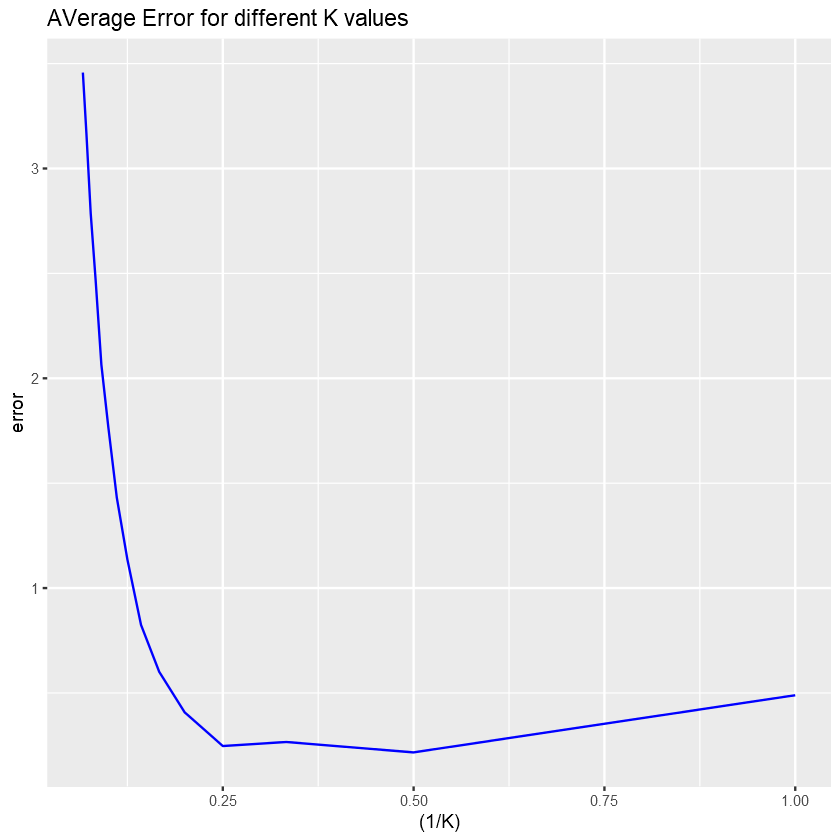

In [11]:
#Plotting the average errors for different K values.
ggplot(data=error_file, aes(x=(1/K), y=error)) + geom_line(color='blue') + ggtitle("AVerage Error for different K values")

#### Question III. 

Report (in your Jupyter Notebook file) the optimum value for K based on your plot for this Leave-One-Out cross validation in the previous part (Part II).

#### Answer 
- Estimating the Optimum value for K based on testing error
 1. Optimum value for k lies at the value of ~0.5 of 1/K which corresponds to the **K-Value of 2**

To choose the most appropriate k folds, we have to make a tradeoff between bias and variance. If k is small, we have a high bias but a low variance for estimating test error; if k is big, we have a low bias and a high variance.

#### References :

- https://towardsdatascience.com/beginners-guide-to-k-nearest-neighbors-in-r-from-zero-to-hero-d92cd4074bdb